In [4]:
import pandas as pd
gc = pd.read_csv("Datasets/German_credit_classification.csv")

In [5]:
gc.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


#### Split the data into Train(Development) and Test (Validation)

In [3]:
from sklearn.model_selection import train_test_split
train_1, test_1 = train_test_split(gc, test_size = 0.30)
train_1.head(2)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
923,0,A12,12,A32,A40,2002,A61,A74,3,A93,...,4,A122,30,A143,A151,1,A173,2,A192,A201
186,1,A12,9,A31,A41,5129,A61,A75,2,A92,...,4,A124,74,A141,A153,1,A174,2,A192,A201


In [7]:
train_1.Default.value_counts()

0    485
1    215
Name: Default, dtype: int64

In [46]:
## fix the randomness 
train , test = train_test_split(gc, test_size = 0.30, random_state = 12) # a type of randomness 1234 is nominal

train.head(2)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
834,1,A13,15,A32,A43,2327,A61,A72,2,A92,...,3,A121,25,A143,A152,1,A172,1,A191,A201
227,1,A11,12,A32,A42,7865,A61,A75,4,A93,...,4,A124,53,A143,A153,1,A174,1,A192,A201


In [47]:
train.Default.value_counts()

0    498
1    202
Name: Default, dtype: int64

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 834 to 843
Data columns (total 21 columns):
Default            700 non-null int64
checkingstatus1    700 non-null object
duration           700 non-null int64
history            700 non-null object
purpose            700 non-null object
amount             700 non-null int64
savings            700 non-null object
employ             700 non-null object
installment        700 non-null int64
status             700 non-null object
others             700 non-null object
residence          700 non-null int64
property           700 non-null object
age                700 non-null int64
otherplans         700 non-null object
housing            700 non-null object
cards              700 non-null int64
job                700 non-null object
liable             700 non-null int64
tele               700 non-null object
foreign            700 non-null object
dtypes: int64(8), object(13)
memory usage: 120.3+ KB


In [49]:
from statsmodels.formula.api import glm ## logistic Regression
import statsmodels.api as sm

In [50]:
gc.columns

Index(['Default', 'checkingstatus1', 'duration', 'history', 'purpose',
       'amount', 'savings', 'employ', 'installment', 'status', 'others',
       'residence', 'property', 'age', 'otherplans', 'housing', 'cards', 'job',
       'liable', 'tele', 'foreign'],
      dtype='object')

In [51]:
features = ' + '.join(gc.drop('Default',axis = 1).columns)

In [52]:
## creating model object 
mod_log = glm(formula ='Default ~ duration', 
              data = train, 
              family = sm.families.Binomial())
## fitting the model
mod_fit = mod_log.fit()
## getting the summary
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      698
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -409.82
Date:                Sun, 17 Mar 2019   Deviance:                       819.65
Time:                        21:57:42   Pearson chi2:                     699.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5822      0.174     -9.098      0.000      -1.923      -1.241
duration       0.0310      0.007      4.624      0.000       0.018       0.044
==============================================================================
"""

In [53]:
train.checkingstatus1.value_counts()

A14    283
A11    191
A12    181
A13     45
Name: checkingstatus1, dtype: int64

In [54]:
mod_log = glm(formula ='Default ~'+features, 
              data = train, 
              family = sm.families.Binomial())
## fitting the model
mod_fit = mod_log.fit()
## getting the summary
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      651
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -301.69
Date:                Sun, 17 Mar 2019   Deviance:                       603.39
Time:                        21:57:43   Pearson chi2:                     689.
No. Iterations:                     6                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.6797      1.351      1.243      0.214      -0.968       4.328
checkingstatus1[T.A12]    -0.4284      0.275     -1.556      0.120      -0.968       0.111
checkingstatus1[T.A13]    -1.0433      0.436     -2.394      0.017      -1.897      -0.189
checkingstatus1[T.A14]    -1.7357      0.284     -6.116      0.000      -2.292      -1.180
history[T.A31]            -0.2369      0.671     -0.353      0.724      -1.553       1.079
history[T.A32]            -0.6558      0.541     -1.212      0.226      -1.717       0.405
history[T.A33]            -0.7633      0.606     -1.260      0.208      -1.950       0.424
history[T.A34]            -1.5541      0.550     -2.826      0.005      -2.632      -0.476
purpose[T.A41]            -1.4730      0.435     -3.387      0.001      -2.326      -0.621
purpose[T.A410]           -2.7941      1.363     -2.050      0.040      -5.466      -0.122
purpose[T.A42]            -0.7623      0.326     -2.341      0.019      -1.400      -0.124
purpose[T.A43]            -1.1697      0.309     -3.790      0.000      -1.775      -0.565
purpose[T.A44]            -0.5020      0.831     -0.604      0.546      -2.130       1.126
purpose[T.A45]            -0.4374      0.681     -0.642      0.521      -1.772       0.897
purpose[T.A46]             0.2481      0.484      0.513      0.608      -0.701       1.197
purpose[T.A48]            -1.5724      1.372     -1.146      0.252      -4.262       1.117
purpose[T.A49]            -0.8208      0.404     -2.033      0.042      -1.612      -0.029
savings[T.A62]            -0.0423      0.349     -0.121      0.904      -0.727       0.643
savings[T.A63]            -0.3389      0.486     -0.698      0.485      -1.291       0.613
savings[T.A64]            -1.4464      0.648     -2.233      0.026      -2.716      -0.177
savings[T.A65]            -1.1990      0.344     -3.482      0.000      -1.874      -0.524
employ[T.A72]              0.1476      0.547      0.270      0.787      -0.924       1.219
employ[T.A73]              0.0720      0.533      0.135      0.892      -0.972       1.117
employ[T.A74]             -0.4441      0.576     -0.771      0.441      -1.573       0.684
employ[T.A75]              0.0121      0.539      0.023      0.982      -1.044       1.068
status[T.A92]             -0.1566      0.491     -0.319      0.750      -1.119       0.806
status[T.A93]             -0.6540      0.472     -1.385      0.166      -1.580       0.272
status[T.A94]             -0.3509      0.583     -0.602      0.547      -1.493       0.791
others[T.A102]             0.6034      0.530      1.139      0.255      -0.435       1.642
others[T.A103]            -0.9158      0.476     -1.922      0.055      -1.850       0.018
property[T.A122]          -0.0369      0.313     -0.118      0.906      -0.650       0.576
property[T.A123]          -0.0045      0.284     -0.016      0.987  

In [55]:
mod_fit.aic, mod_fit.deviance

(701.3898657461639, 603.3898657461639)

In [56]:
mod_fit.aic

701.3898657461639

In [57]:
mod_fit.predict()

array([1.64534428e-01, 5.01295959e-01, 7.83894080e-01, 6.22898868e-01,
       2.58227726e-01, 1.06588581e-01, 3.83680036e-01, 2.98596486e-01,
       8.17352691e-01, 2.94869280e-01, 1.92779476e-02, 1.90960395e-01,
       1.63920290e-01, 7.24163052e-02, 2.20724218e-01, 8.10022499e-02,
       1.12058940e-01, 6.66581930e-01, 1.49940941e-01, 2.18006985e-01,
       8.35680280e-02, 1.11926536e-02, 7.92524795e-01, 9.51603818e-01,
       7.77520769e-01, 1.09971571e-02, 5.19402261e-01, 1.79861410e-01,
       7.13902292e-02, 1.55025340e-01, 1.92329611e-02, 1.86028948e-01,
       4.54140611e-01, 4.51812919e-01, 1.60469239e-01, 6.67311774e-02,
       1.85002846e-02, 3.08628522e-01, 9.53711142e-01, 4.66478961e-01,
       1.06303774e-01, 1.44398358e-01, 2.38217094e-01, 1.53344913e-01,
       7.52479233e-01, 7.26740534e-02, 5.43164062e-01, 6.80120863e-01,
       1.54411863e-02, 1.84106616e-01, 2.56911388e-01, 1.13958933e-01,
       2.41292907e-01, 7.33519742e-01, 1.32189300e-01, 5.52331896e-01,
      

In [58]:
# predict the prob of 1 --> prob of person defaulting
prob = mod_fit.predict(test)

In [59]:
print(prob[:5])

518    0.320178
871    0.009590
797    0.106534
274    0.747333
325    0.016515
dtype: float64


In [60]:
test['prob']= prob

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
## classifying these prob into 0 and 1 classes 
threshold = 0.5 ## prob is <0.5 ===> 0 >= 0.5 class ===> 1
y_class =[]
for i in prob:
    if i<threshold:
        y_class.append(0)
    else:
        y_class.append(1)

In [62]:
print(y_class)

[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [63]:
def class_conversion(prob):
    if prob >= 0.5:
        return 1
    else :
        return 0

In [64]:
test['class_label'] = test['prob'].apply(class_conversion)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
test[['Default','class_label']].head(10)

,Default,class_label
518,0,0
871,0,0
797,0,0
274,1,1
325,0,0
827,1,0
766,1,1
832,1,1
931,1,0
368,1,1


In [66]:
## confusion Matrix

## Actual Vs Predicted

pd.crosstab(test.class_label,test.Default)

Default,0,1
class_label,,
0,177,55
1,25,43


In [67]:
(177+43)/300

0.7333333333333333

In [68]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [69]:
confusion_matrix(test.class_label,test.Default)

array([[177,  55],
       [ 25,  43]])

Alternative method

In [70]:
TP = 172 ## true positives --> positive outcome correctly(True) identified
TN = 45
FP = 54
FN = 29

In [71]:
accuracy_score(test.class_label,test.Default)*100

73.33333333333333

Classfication Model Evaluation Metrics

#### 1. Accuracy  = (TP + TN) / (total No)
#### 2. Sensitivity --- Recall -- TPR = TP /(TP +FN)
#### 3. Specifictity -- TNR = TN /(TN+FP)
#### 4. Precision -- PPV  = TP / (TP +FP)
#### 5. NPV   = TN / (TN+FN)


In [49]:
Accuracy = (TP + TN)/(TP+TN+FP+FN)
Accuracy*100

72.33333333333334

In [72]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN)

In [73]:
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([85.5721393 , 45.45454545, 76.10619469, 60.81081081])

In [74]:
## classifying these prob into 0 and 1 classes 
threshold = 0.7 ## prob is <0.5 ===> 0 >= 0.5 class ===> 1
y_class =[]
for i in prob:
    if i< threshold:
        y_class.append(0)
    else:
        y_class.append(1)
test["Predict_class"] = y_class

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
pd.crosstab(test.Predict_class,test.Default)

Default,0,1
Predict_class,,
0,194,73
1,8,25


In [76]:
TP = 195 ## true positives --> positive outcome correctly(True) identified
TN = 23
FP = 76
FN = 6

In [77]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN)
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([97.01492537, 23.23232323, 71.95571956, 79.31034483])

In [54]:
Accuracy = (TP + TN)/(TP+TN+FP+FN)
Accuracy*100

72.66666666666667

In [78]:
## classifying these prob into 0 and 1 classes 
threshold = 0.3 ## prob is <0.5 ===> 0 >= 0.5 class ===> 1
y_class =[]
for i in prob:
    if i< threshold:
        y_class.append(0)
    else:
        y_class.append(1)
test["Predict_class"] = y_class
pd.crosstab(test.Predict_class,test.Default)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Default,0,1
Predict_class,,
0,149,33
1,53,65


In [79]:
TP = 157 ## true positives --> positive outcome correctly(True) identified
TN = 67
FP = 32
FN = 44

In [80]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN)
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([78.10945274, 67.67676768, 83.06878307, 60.36036036])

In [81]:
import sklearn.metrics as skm

In [51]:
cf = confusion_matrix(test["Default"], test.class_label)

In [58]:
cf[1,1]

45

In [54]:
accuracy_score(test["Default"], test.class_label)*100

72.33333333333334

In [55]:
TP = cf[0,0]
TN = cf[1,1]
FP = cf[0,1]
FN = cf[1,0]

In [60]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN)
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([85.5721393 , 45.45454545, 76.10619469, 60.81081081])

In [82]:
print(classification_report(test["Default"],test.class_label,digits = 3))

             precision    recall  f1-score   support

          0      0.763     0.876     0.816       202
          1      0.632     0.439     0.518        98

avg / total      0.720     0.733     0.718       300



In [84]:
test["Default"].value_counts()

0    202
1     98
Name: Default, dtype: int64

In [63]:
confusion_matrix( test.Predict_class,test["Default"])

array([[157,  32],
       [ 44,  67]])

In [85]:
train.Default.value_counts()

0    498
1    202
Name: Default, dtype: int64

In [91]:
train.loc[train.checkingstatus1 != 'A11','Default'].value_counts()

0    397
1    112
Name: Default, dtype: int64

# Decision Trees 

In [93]:
gc = pd.read_csv("Datasets/German_credit_classification.csv")

In [94]:
# Train and Test split
train , test = train_test_split(gc, test_size = 0.30, random_state = 2) # a type of randomness 1234 is nominal

In [95]:
from sklearn import tree

In [98]:
## create a model object  as dt
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
train.drop("Default",axis = 1).head(2)

,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
90,A14,12,A34,A43,618,A61,A75,4,A93,A101,4,A121,56,A143,A152,1,A173,1,A191,A201
305,A14,6,A32,A42,1543,A64,A73,4,A91,A101,2,A121,33,A143,A152,1,A173,1,A191,A201


In [101]:
## calling the fit method on the object 
dt.fit(train.drop("Default",axis=1),train["Default"])

ValueError: could not convert string to float: 'A201'

In [105]:
gc_new = pd.get_dummies(gc)
gc_new.checkingstatus1_A11.value_counts()

0    726
1    274
Name: checkingstatus1_A11, dtype: int64

In [106]:
gc[gc.checkingstatus1 == 'A11'].shape

(274, 21)

In [107]:
# Train and Test split
train , test = train_test_split(gc_new, test_size = 0.30, random_state = 2) # a type of randomness 1234 is nominal

In [108]:
## Decision Trees
dt = tree.DecisionTreeClassifier()

In [109]:
## dt.fit(X--> independent variables, y---> Target variable)
dt.fit(train.drop("Default",axis=1),train["Default"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
## prediction---> confusion matrix
test['y_pred'] = dt.predict(test.drop('Default',axis = 1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
pd.crosstab(test.y_pred,test.Default)

Default,0,1
y_pred,,
0,160,56
1,41,43


In [113]:
print(accuracy_score(test.y_pred,test.Default))

0.6766666666666666


In [112]:
print(classification_report(test.y_pred,test.Default))

             precision    recall  f1-score   support

          0       0.80      0.74      0.77       216
          1       0.43      0.51      0.47        84

avg / total       0.69      0.68      0.68       300



In [114]:
dt.feature_importances_

array([0.06497638, 0.16056694, 0.04102093, 0.0342027 , 0.08842397,
       0.01784771, 0.01360377, 0.        , 0.00465275, 0.02299149,
       0.08978223, 0.00948329, 0.01409022, 0.00348957, 0.01902483,
       0.00465275, 0.00478846, 0.02510094, 0.        , 0.00699868,
       0.02229721, 0.        , 0.        , 0.01037397, 0.        ,
       0.01126456, 0.03212347, 0.00324031, 0.00974541, 0.00523435,
       0.00969324, 0.        , 0.00465275, 0.02089585, 0.00837882,
       0.01687745, 0.01761601, 0.01121559, 0.        , 0.00551577,
       0.01511843, 0.01129292, 0.        , 0.02186611, 0.02329451,
       0.        , 0.00465275, 0.01642106, 0.        , 0.01523777,
       0.00465275, 0.00904115, 0.00603196, 0.00551577, 0.        ,
       0.01287327, 0.01209716, 0.01467407, 0.01240791, 0.        ,
       0.        ])

In [143]:
feature_importance = pd.DataFrame()
feature_importance['variables'] = train.drop("Default",axis=1).columns
feature_importance['importance'] = dt.feature_importances_

In [144]:
feature_importance

,variables,importance
0,duration,0.064976
1,amount,0.160567
2,installment,0.041021
3,residence,0.034203
4,age,0.088424
5,cards,0.017848
6,liable,0.013604
7,checkingstatus1_A11,0.000000
8,checkingstatus1_A12,0.004653
9,checkingstatus1_A13,0.022991


In [145]:
feature_importance.sort_values('importance',ascending = False,inplace = True)
feature_importance

,variables,importance
1,amount,0.160567
10,checkingstatus1_A14,0.089782
4,age,0.088424
0,duration,0.064976
2,installment,0.041021
3,residence,0.034203
26,savings_A61,0.032123
17,purpose_A41,0.025101
44,property_A122,0.023295
9,checkingstatus1_A13,0.022991


In [146]:
feature_importance.reset_index(drop = True, inplace = True)
feature_importance

,variables,importance
0,amount,0.160567
1,checkingstatus1_A14,0.089782
2,age,0.088424
3,duration,0.064976
4,installment,0.041021
5,residence,0.034203
6,savings_A61,0.032123
7,purpose_A41,0.025101
8,property_A122,0.023295
9,checkingstatus1_A13,0.022991


In [148]:
var = feature_importance.loc[feature_importance.importance>0,'variables'].values

In [149]:
X = train[var]

In [150]:
Y = train.Default

In [151]:
dt = tree.DecisionTreeClassifier()
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [154]:
test['predict'] = dt.predict(test[var])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
accuracy_score(test['predict'] ,test.Default)

0.6633333333333333

In [156]:
dt.feature_importances_

array([0.15221968, 0.08978223, 0.08535434, 0.07955703, 0.04351348,
       0.03040295, 0.03270507, 0.02510094, 0.01806016, 0.02299149,
       0.00814861, 0.02186611, 0.03369093, 0.01902483, 0.01747999,
       0.01721809, 0.0122247 , 0.01956167, 0.        , 0.01179806,
       0.01240791, 0.01409022, 0.01360377, 0.00822052, 0.01351088,
       0.01209716, 0.01169084, 0.01184616, 0.01121559, 0.01442298,
       0.02312208, 0.01019729, 0.00948329, 0.01311231, 0.00837882,
       0.00699868, 0.01068472, 0.01052405, 0.00859759, 0.00523435,
       0.00851066, 0.00872392, 0.        , 0.00913632, 0.        ,
       0.00348957, 0.        , 0.        ])

In [158]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt, out_file = None,
                                feature_names = X.columns, 
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  

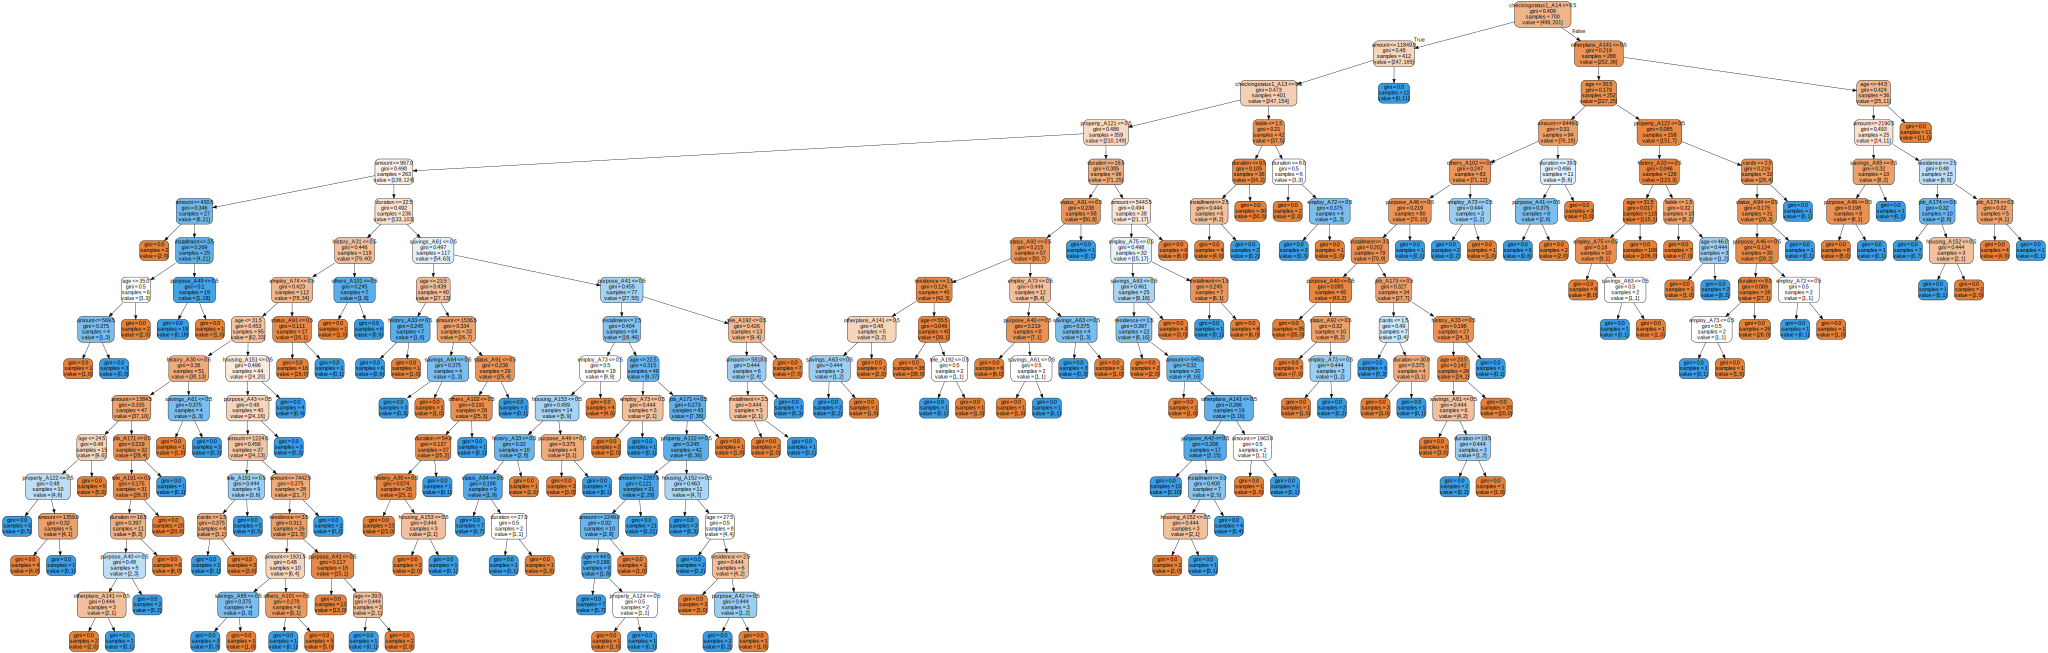

In [159]:
graph

In [160]:
graph.render('dcsn')

'dcsn.pdf'

In [264]:
pwd()

'/Users/nimisha/Downloads/Ds Simplilearn data'

In [42]:
## pruning -- limiting the growth of the tree

In [161]:
dt_prune = tree.DecisionTreeClassifier(min_samples_leaf = 15 , min_samples_split = 45)
dt_prune.fit(train.drop("Default",axis=1),train["Default"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
dt_prune

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [164]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt_prune, out_file = None,
                                feature_names = train.drop("Default",axis=1).columns, 
                                class_names= ['Non Defaulter','Defaulter'],
                                
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data) 

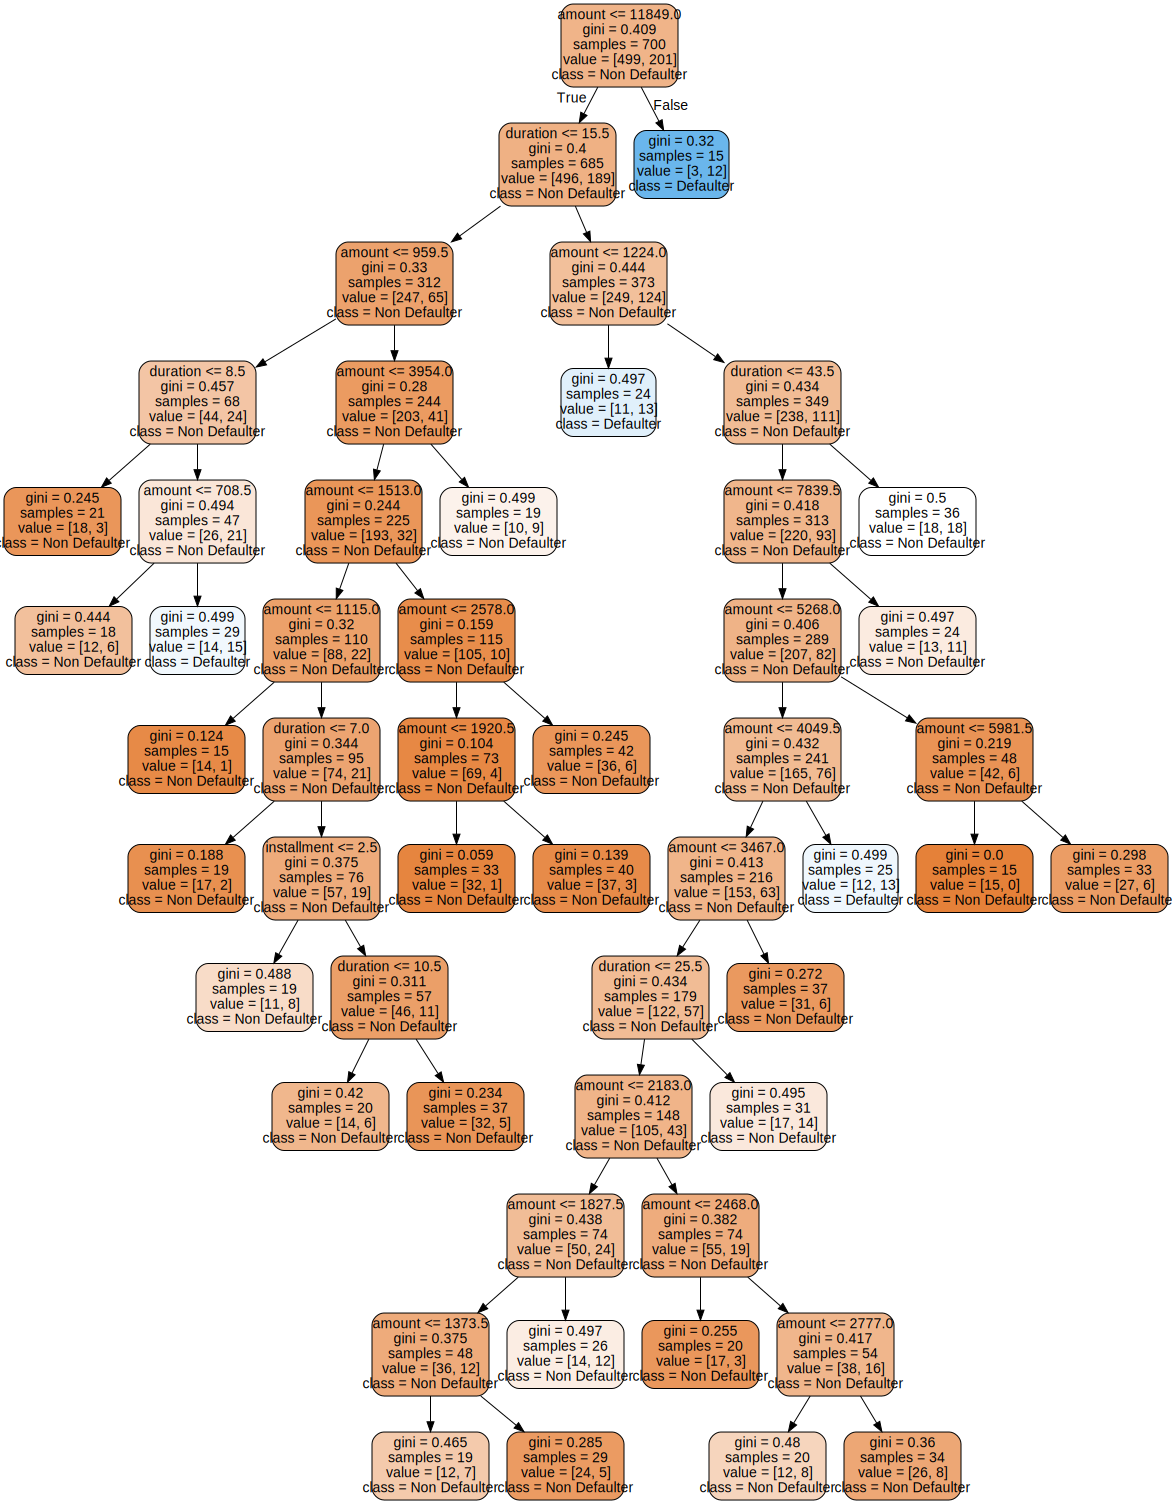

In [288]:
graph

In [165]:
graph.render('dcsn_prune')

'dcsn_prune.pdf'

In [169]:
test.columns

Index(['Default', 'duration', 'amount', 'installment', 'residence', 'age',
       'cards', 'liable', 'checkingstatus1_A11', 'checkingstatus1_A12',
       'checkingstatus1_A13', 'checkingstatus1_A14', 'history_A30',
       'history_A31', 'history_A32', 'history_A33', 'history_A34',
       'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'savings_A61', 'savings_A62',
       'savings_A63', 'savings_A64', 'savings_A65', 'employ_A71', 'employ_A72',
       'employ_A73', 'employ_A74', 'employ_A75', 'status_A91', 'status_A92',
       'status_A93', 'status_A94', 'others_A101', 'others_A102', 'others_A103',
       'property_A121', 'property_A122', 'property_A123', 'property_A124',
       'otherplans_A141', 'otherplans_A142', 'otherplans_A143', 'housing_A151',
       'housing_A152', 'housing_A153', 'job_A171', 'job_A172', 'job_A173',
       'job_A174', 'tele_A191', 'tele_A192', 'for

In [170]:
test['y_pred'] = dt_prune.predict(test.drop(['Default','predict','y_pred'],axis = 1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [171]:
test.head()

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A11,checkingstatus1_A12,...,job_A171,job_A172,job_A173,job_A174,tele_A191,tele_A192,foreign_A201,foreign_A202,y_pred,predict
37,1,18,2100,4,2,37,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0
726,0,15,1316,2,2,47,2,1,0,0,...,0,1,0,0,1,0,1,0,0,1
846,1,18,6761,2,4,68,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
295,1,48,9960,1,2,26,1,1,0,1,...,0,0,1,0,0,1,1,0,1,1
924,1,24,6872,2,1,55,1,1,1,0,...,0,0,1,0,0,1,1,0,0,1


In [172]:
pd.crosstab(test.y_pred,test.Default)

Default,0,1
y_pred,,
0,169,58
1,32,41


In [174]:
accuracy_score(test.y_pred,test.Default)

0.7

# K Nearest Neighbor 

In [11]:
# only numerical data from the dataset
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.1+ KB


In [8]:
gc['Default'].dtype

dtype('int64')

In [9]:
column_name = [x for x in gc.columns if gc[x].dtype == 'int64']

In [10]:
column_name

['Default',
 'duration',
 'amount',
 'installment',
 'residence',
 'age',
 'cards',
 'liable']

In [12]:
gc_new = gc[column_name]

In [13]:
gc_new_2 = pd.concat([gc.Default,gc.amount,gc.duration,gc.installment],axis = 1)

In [14]:
gc_new.head()

,Default,duration,amount,installment,residence,age,cards,liable
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [16]:
gc_new.Default = gc_new.Default.astype('category')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_1, test_1 = train_test_split(gc_new, test_size = 0.30,random_state = 1234)

In [20]:
from sklearn import preprocessing as pp

In [21]:
train_std = pp.scale(train_1.drop('Default', axis = 1))
test_std = pp.scale(test_1.drop('Default', axis = 1))

In [22]:
scaler = pp.StandardScaler()
scaler.fit(train_1.drop('Default', axis = 1))
train_std = scaler.transform(train_1.drop('Default', axis = 1))
scaler.fit(test_1.drop('Default', axis = 1))
test_std =scaler.transform(test_1.drop('Default', axis = 1))

In [86]:
## implementing the knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [31]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(train_std,train_1["Default"])
prd = neigh.predict(test_std)
accuracy_score(test_1["Default"],prd)*100


62.66666666666667

range(start, stop, step)

In [34]:
pd.crosstab(test_1["Default"],y_pred)

col_0,0,1
Default,,
0,198,8
1,89,5


In [ ]:
acc

In [33]:
for k_value in range(1,30,2):
    neigh = KNeighborsClassifier(n_neighbors = k_value)
    neigh.fit(train_std,train_1["Default"]) 
    y_pred = neigh.predict(test_std)
    print ("Accuracy is {} for K-Value:{}".format(\
        round(accuracy_score(test_1["Default"],y_pred)*100,2),k_value))

Accuracy is 62.67 for K-Value:1
Accuracy is 67.67 for K-Value:3
Accuracy is 69.0 for K-Value:5
Accuracy is 65.33 for K-Value:7
Accuracy is 66.67 for K-Value:9
Accuracy is 67.33 for K-Value:11
Accuracy is 67.33 for K-Value:13
Accuracy is 66.67 for K-Value:15
Accuracy is 68.33 for K-Value:17
Accuracy is 67.33 for K-Value:19
Accuracy is 67.67 for K-Value:21
Accuracy is 67.0 for K-Value:23
Accuracy is 68.0 for K-Value:25
Accuracy is 68.0 for K-Value:27
Accuracy is 67.67 for K-Value:29


In [36]:
## final model
neigh = KNeighborsClassifier(n_neighbors = 13)
neigh.fit(train_std,train_1["Default"]) 
y_pred = neigh.predict(test_std)


In [37]:
## confusion matrix 
pd.crosstab(test_1["Default"],y_pred)

col_0,0,1
Default,,
0,193,13
1,85,9


In [40]:
## classification report
print(classification_report(test_1["Default"],y_pred,digits = 3))

             precision    recall  f1-score   support

          0      0.694     0.937     0.798       206
          1      0.409     0.096     0.155        94

avg / total      0.605     0.673     0.596       300



## SUPPORT VECTOR Model

In [41]:
from sklearn.svm import SVC

In [42]:
gc_new.head()

,Default,duration,amount,installment,residence,age,cards,liable
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [43]:
# Train and Test split
train , test = train_test_split(gc_new, test_size = 0.30, random_state = 2) # a type of randomness 1234 is nominal

In [44]:
train_1 = train[:200]

In [45]:
test_1 = test[:10]

In [47]:
?SVC

In [48]:
svmclassifier = SVC(C = 10,kernel='linear')

In [53]:
svmclassifier.fit(train.drop('Default',axis = 1), train.Default)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
y_predict = svmclassifier.predict(test.drop(['Default'],axis = 1))

In [55]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
pd.crosstab(test_1.Default,y_predict)

col_0,0
Default,
0,6
1,4


## Naive Baisean Model

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gb = GaussianNB()

In [59]:
mod = gb.fit(train.drop('Default',axis = 1),train.Default)

In [65]:
pred = mod.predict(test.drop('Default',axis = 1))

In [66]:
pd.crosstab(pred,test.Default)

Default,0,1
row_0,,
0,181,71
1,20,28


In [68]:
print(classification_report(pred,test.Default))

             precision    recall  f1-score   support

          0       0.90      0.72      0.80       252
          1       0.28      0.58      0.38        48

avg / total       0.80      0.70      0.73       300



In [71]:
print(accuracy_score(pred,test.Default)*100,"%")

69.66666666666667 %
